In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Since the data is over 100MB, download the csv files from Kaggle and put them in a subfolder called 'Data' in the same directory as this notebook.
# The Data folder is listed in the .gitignore file so only files outside of the Data folder will be pushed to GitHub.
holidays_events = pd.read_csv('Data/holidays_events.csv')
oil = pd.read_csv('Data/oil.csv')
sample_submission = pd.read_csv('Data/sample_submission.csv')
stores = pd.read_csv('Data/stores.csv')
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')
transactions = pd.read_csv('Data/transactions.csv')

In [4]:
display(oil)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [5]:
display(stores)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [6]:
display(transactions)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [7]:
display(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


/var/folders/g4/0rdw429j6pz6zgc8bjxh7zqm0000gn/T/ipykernel_1416/3916133513.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'GROCERY I'),
 Text(1, 0, 'BEVERAGES'),
 Text(2, 0, 'PRODUCE'),
 Text(3, 0, 'CLEANING'),
 Text(4, 0, 'DAIRY'),
 Text(5, 0, 'BREAD/BAKERY'),
 Text(6, 0, 'POULTRY'),
 Text(7, 0, 'MEATS'),
 Text(8, 0, 'PERSONAL CARE'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'HOME CARE'),
 Text(11, 0, 'EGGS'),
 Text(12, 0, 'FROZEN FOODS'),
 Text(13, 0, 'PREPARED FOODS'),
 Text(14, 0, 'LIQUOR,WINE,BEER'),
 Text(15, 0, 'SEAFOOD'),
 Text(16, 0, 'GROCERY II'),
 Text(17, 0, 'HOME AND KITCHEN I'),
 Text(18, 0, 'HOME AND KITCHEN II'),
 Text(19, 0, 'CELEBRATION'),
 Text(20, 0, 'LINGERIE'),
 Text(21, 0, 'LADIESWEAR'),
 Text(22, 0, 'PLAYERS AND ELECTRONICS'),
 Text(23, 0, 'AUTOMOTIVE'),
 Text(24, 0, 'LAWN AND GARDEN'),
 Text(25, 0, 'PET SUPPLIES'),
 Text(26, 0, 'BEAUTY'),
 Text(27, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(28, 0, 'MAGAZINES'),
 Text(29, 0, 'HARDWARE'),
 Text(30, 0, 'HOME APPLIANCES'),
 Text(31, 0, 'BABY CARE'),
 Text(32, 0, 'BOOKS')]

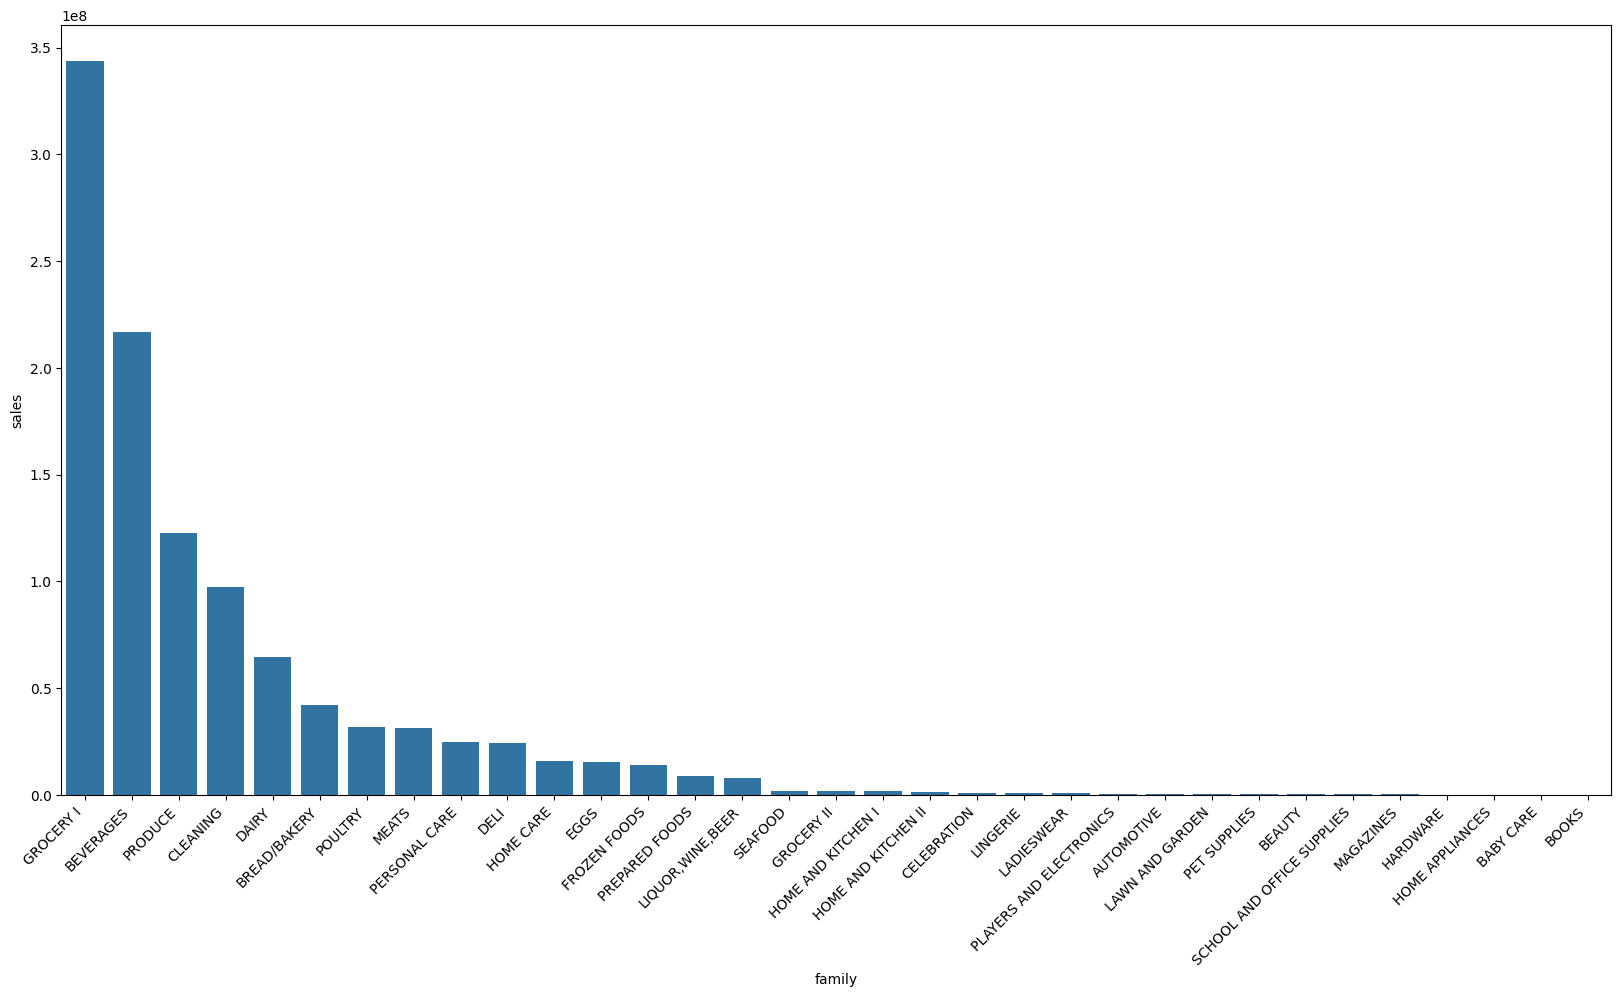

In [8]:
# group by family and add up the sales
family_grouped = train.groupby('family')['sales'].sum().reset_index()
family_grouped = family_grouped.sort_values(by='sales', ascending=False)
# use seaborn to plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='family', y='sales', data=family_grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

/var/folders/g4/0rdw429j6pz6zgc8bjxh7zqm0000gn/T/ipykernel_1416/758283313.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

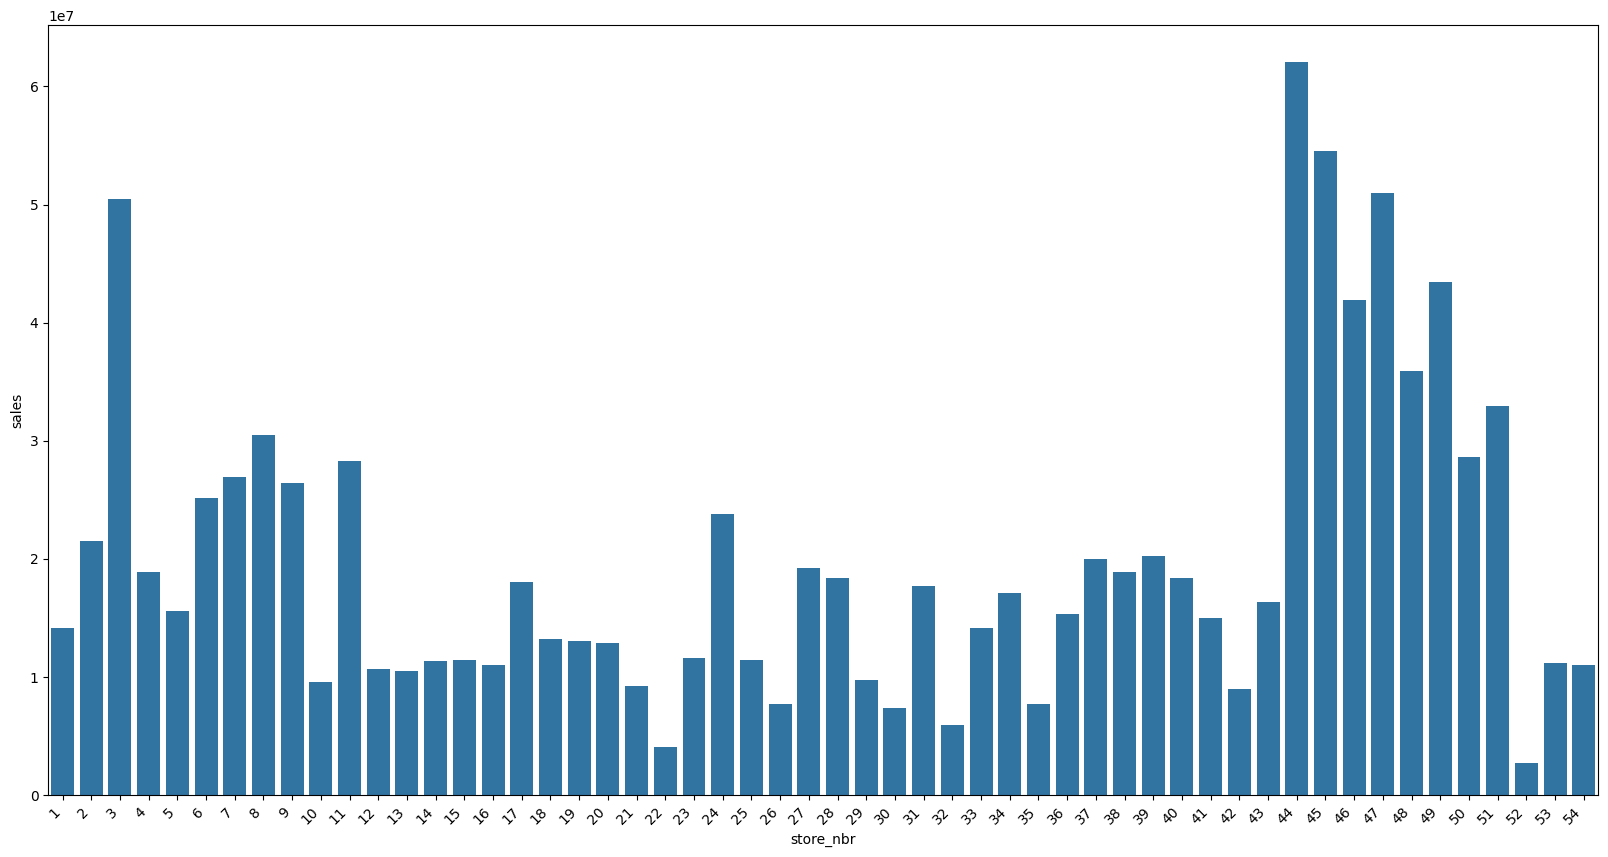

In [11]:
# group by store and add up the sales
store_grouped = train.groupby('store_nbr')['sales'].sum().reset_index()
store_grouped = store_grouped.sort_values(by='sales', ascending=False)
# use seaborn to plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='store_nbr', y='sales', data=store_grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')